## Coca-Cola Sales Forecasting.

In [1]:
## importing laibaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset
df=pd.read_csv("CocaCola_Sales2.csv")

In [3]:
df.head()

,Quarter,Sales,year
0,Q1,1734.827000,1986
1,Q2,2244.960999,1986
2,Q3,2533.804993,1986
3,Q4,2154.962997,1986
4,Q1,1547.818996,1987


In [4]:
## checking shape of the data
df.shape

(42, 3)

### EDA

In [5]:
df

,Quarter,Sales,year
0,Q1,1734.827000,1986
1,Q2,2244.960999,1986
2,Q3,2533.804993,1986
3,Q4,2154.962997,1986
4,Q1,1547.818996,1987
5,Q2,2104.411995,1987
6,Q3,2014.362999,1987
7,Q4,1991.746998,1987
8,Q1,1869.049999,1988
9,Q2,2313.631996,1988


In [6]:
### converting quarter into int with help og OHE
df1=pd.get_dummies(df,columns=['Quarter'])

In [7]:
df1.head(5)

,Sales,year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,1734.827000,1986,1,0,0,0
1,2244.960999,1986,0,1,0,0
2,2533.804993,1986,0,0,1,0
3,2154.962997,1986,0,0,0,1
4,1547.818996,1987,1,0,0,0


<AxesSubplot:>

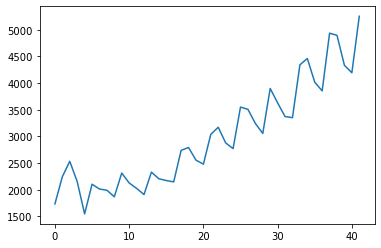

In [8]:
## line plot
df.Sales.plot()

<AxesSubplot:xlabel='Quarter', ylabel='year'>

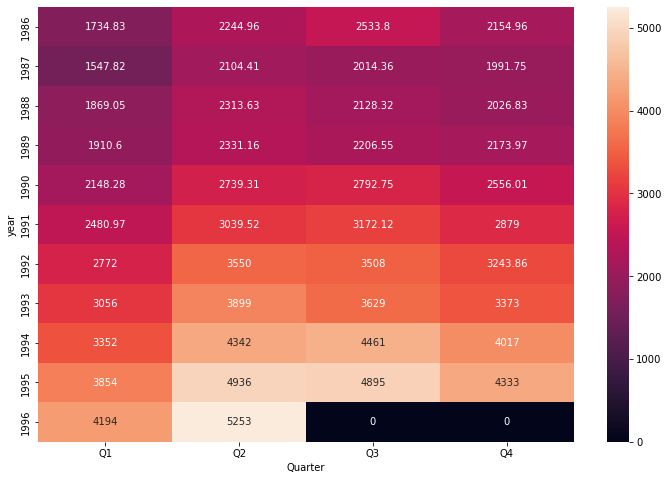

In [9]:
## Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="Quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Sales'>

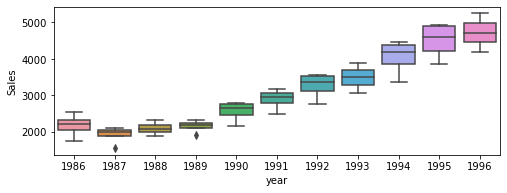

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df)

## From above observation there is a increasing trend.

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

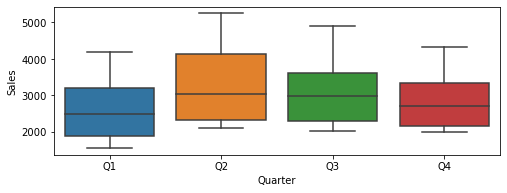

In [11]:
plt.figure(figsize=(8,6))
plt.subplot(212)
sns.boxplot(x="Quarter",y="Sales",data=df)

<AxesSubplot:xlabel='year', ylabel='Sales'>

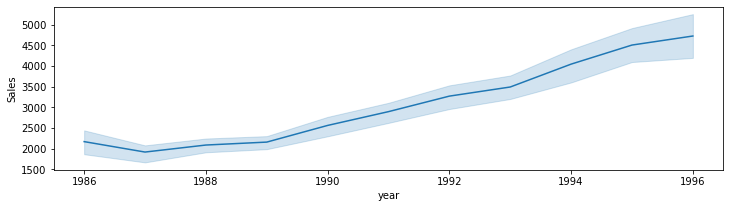

In [12]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=df)

## Moving avrage

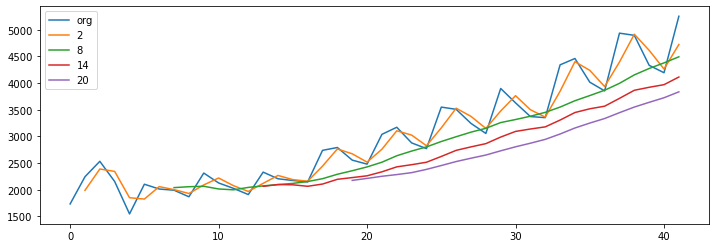

In [13]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,24,6):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

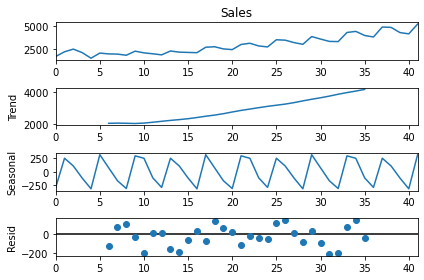

In [14]:
## Time series plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

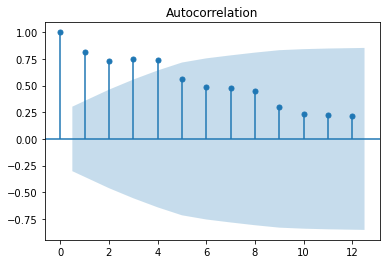

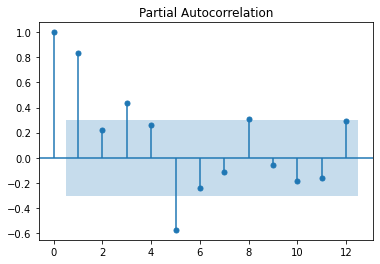

In [15]:
## ACF & Pacf plot
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

In [16]:
## MAPE Evaluation
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [17]:
## spliting data
Train=df1.head(35)
Test=df1.tail(7)

### Simple Exponential Method

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [23]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.6)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
a=MAPE(pred_ses,Test.Sales) 
print(a)

9.34172831434834


## Holts method

In [25]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.2, smoothing_slope=0.6)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
b=MAPE(pred_hw,Test.Sales) 
print(b)

8.62525745482154


C:\Users\ANIKET~1\AppData\Local\Temp/ipykernel_20680/2455059710.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.2, smoothing_slope=0.6)


### Holts winter exponential smoothing with additive seasonality and additive trend

In [26]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
c=MAPE(pred_hwe_add_add,Test.Sales) 
print(c)

3.7163196494966155


### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [27]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
d=MAPE(pred_hwe_mul_add,Test.Sales)
print(d)

2.9535511888386856


In [28]:
## Result table
data = {"MODEL":pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_add "]),"MAPE":pd.Series([a,b,c,d])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['MAPE'])

,MODEL,MAPE
3,hwe_model_mul_add,2.953551
2,hwe_model_add_add,3.716320
1,hw_model,8.625257
0,ses_model,9.341728


## From above observation Holts winter exponential smoothing with multiplicative seasonality and additive trend gives less MAPE so we used it for final model.

In [29]:
## Final model
hwe_model_mul_add = ExponentialSmoothing(df["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

C:\Users\Aniket Mali\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [30]:
## Forecasting next 10 values
hwe_model_mul_add.forecast(10)

42    4921.344757
43    4587.904830
44    4532.415883
45    5757.297007
46    5816.304511
47    5208.853872
48    4956.781272
49    6238.094385
50    6082.781377
51    5456.386219
dtype: float64

# ARIMA MODEL

In [31]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings

In [41]:
train=df1.iloc[:,0:2]

In [43]:
train.head(5)

,Sales,year
0,1734.827000,1986
1,2244.960999,1986
2,2533.804993,1986
3,2154.962997,1986
4,1547.818996,1987


In [64]:
df2=df.drop(['Quarter','year'],axis=1)

In [66]:
# separate out a validation dataset
split_point = len(df2) - 5
dataset, validation = df2[0:split_point], df2[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 37, Validation 5


In [67]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

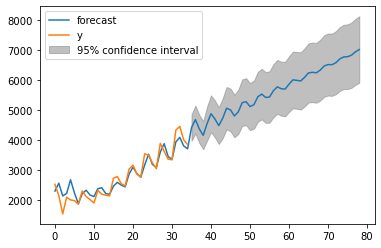

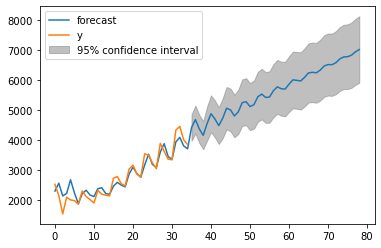

In [74]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=5)[0]
model_fit.plot_predict(1, 79)

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

398.21648221394423

In [79]:
forecast

array([4421.40280787, 4690.8780357 , 4380.1815528 , 4168.62590824,
       4557.63258372])

In [80]:
df.tail(5)

,Quarter,Sales,year
37,Q2,4936.0,1995
38,Q3,4895.0,1995
39,Q4,4333.0,1995
40,Q1,4194.0,1996
41,Q2,5253.0,1996
